In [29]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn.preprocessing as pp
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score
import seaborn as sns
import scipy.cluster.hierarchy as shc
import nbformat
import matplotlib.pyplot as plt

In [30]:
os.chdir(r'C:\Users\Erika\Documents\CSE565ASS2 Jupter\models\input')

In [35]:
raw_data = pd.read_csv('testCase_dataset.csv')

In [36]:
print(raw_data.shape) # rows and columns
raw_data.head() # first 5 records

(3200, 70)


,TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,TC_8,TC_9,TC_10,...,TC_61,TC_62,TC_63,TC_64,TC_65,TC_66,TC_67,TC_68,TC_69,TC_70
0,-0.032961,-0.009019,0.039141,0.017633,-0.005844,-0.048032,-0.029008,0.008797,-0.035524,0.015424,...,-0.032961,-0.009019,0.039141,0.017633,-0.005844,-0.048032,-0.029008,0.008797,-0.035524,0.015424
1,0.015687,-0.018939,-0.007648,-0.011091,-0.011479,-0.014646,-0.023024,0.030133,-0.005004,0.049249,...,0.015687,-0.018939,-0.007648,-0.011091,-0.011479,-0.014646,-0.023024,0.030133,-0.005004,0.049249
2,0.023829,0.000333,-0.046762,0.040025,0.047345,0.003253,0.018476,0.031331,0.007127,0.019236,...,0.023829,0.000333,-0.046762,0.040025,0.047345,0.003253,0.018476,0.031331,0.007127,0.019236
3,0.007979,-0.047816,-0.033260,-0.009005,0.022027,0.039744,-0.001718,0.049106,0.004669,0.004724,...,0.007979,-0.047816,-0.033260,-0.009005,0.022027,0.039744,-0.001718,0.049106,0.004669,0.004724
4,0.049141,0.020121,-0.031955,0.009452,-0.031006,0.032808,0.030690,-0.001446,0.014336,-0.049198,...,0.049141,0.020121,-0.031955,0.009452,-0.031006,0.032808,0.030690,-0.001446,0.014336,-0.049198


Text(0, 0.5, 'Silhouette Score')

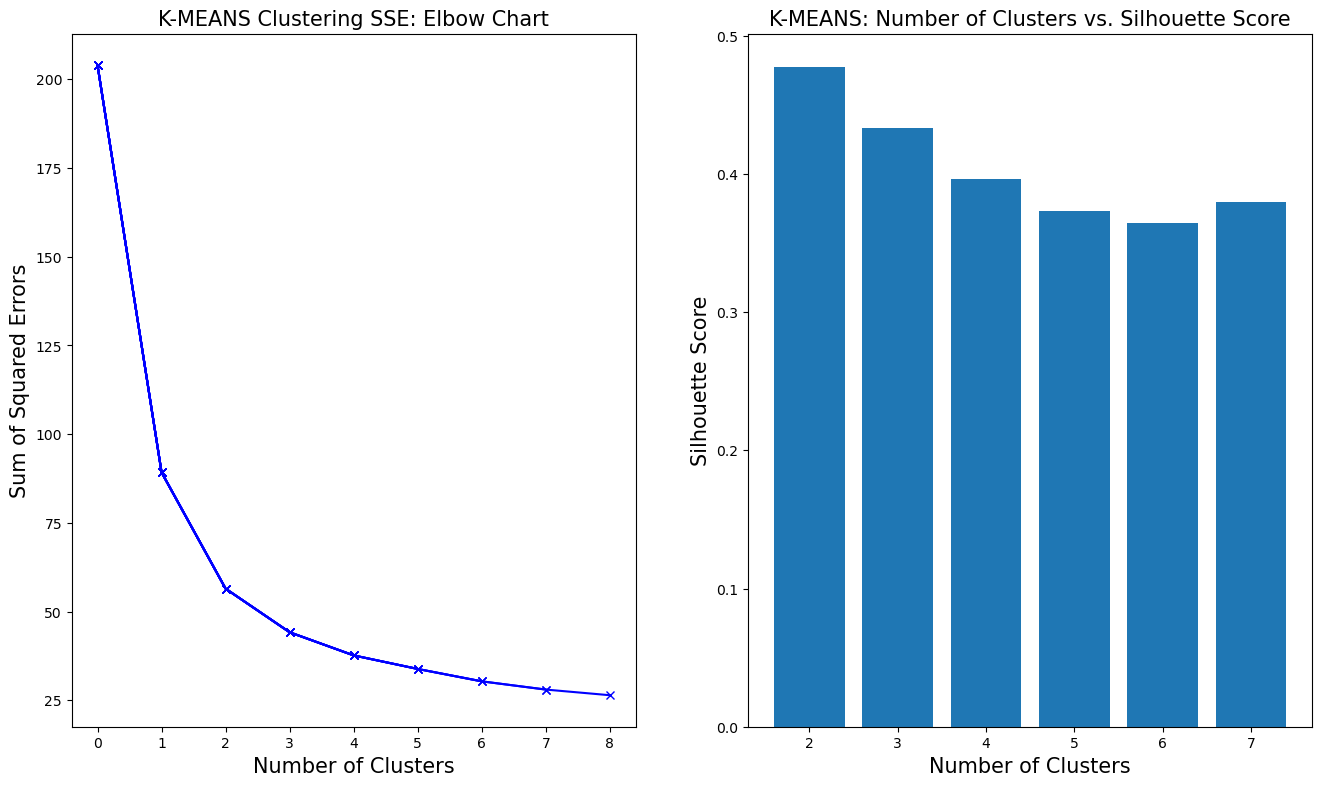

In [37]:
figure = plt.figure(figsize=(16, 9))
elbow = figure.add_subplot(1,2,1) #elbow chart
kmean_sil = figure.add_subplot(1,2,2) #silhouette bar chart

n_clusters=10
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(raw_data)
    cost.append(kmean.inertia_) 
    elbow.set_ylabel('Sum of Squared Errors', fontsize = 15)
    elbow.set_xlabel('Number of Clusters', fontsize = 15)
    elbow.set_title('K-MEANS Clustering SSE: Elbow Chart', fontsize = 15)
    elbow.plot(cost, 'bx-')


silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(raw_data, KMeans(n_clusters = n_cluster).fit_predict(raw_data))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
kmean_sil.bar(k, silhouette_scores) 
kmean_sil.set_title('K-MEANS: Number of Clusters vs. Silhouette Score', fontsize = 15)
kmean_sil.set_xlabel('Number of Clusters', fontsize = 15) 
kmean_sil.set_ylabel('Silhouette Score', fontsize = 15) 

In [52]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(raw_data)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Evaluate the clustering
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
print('Silhouette Score: {:.4f}'.format(silhouette_avg))

Silhouette Score: 0.4776


In [51]:
# Preprocess your data: Standardization (Optional but recommended)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(raw_data)

birch_model = Birch(n_clusters=2)
birch_model.fit(data_scaled)

# Predict the clustering labels
cluster_labels = birch_model.predict(data_scaled)

# Evaluate the clustering 
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
print('Silhouette Score:', silhouette_avg)


Silhouette Score: 0.43063509263340904
